# Segmentation demonstration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2
sys.path.append('../lib/fundus_lesions_toolkit')
from models.segmentation import segment
from models import list_models
from utils.images import open_image
from utils.visualization import plot_image, plot_image_and_mask
from constants import DEFAULT_COLORS, LESIONS

/home/clement/miniconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/clement/miniconda3/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail19maybe_wrap_dim_slowEllb
  warn(f"Failed to load image Python extension: {e}")


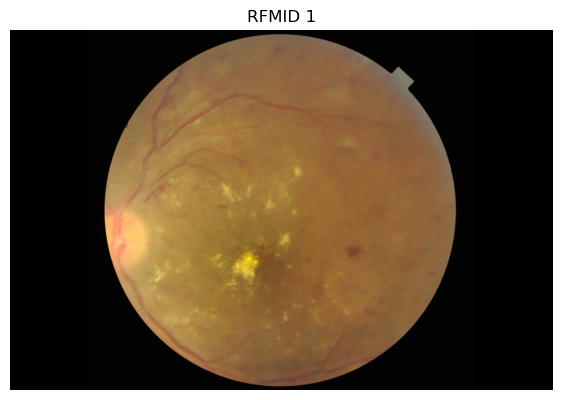

In [3]:
example_path = '../imgs/rfmid_sample_1.png'
img = open_image(example_path)
fsize= (7,7)
plot_image(img, title='RFMID 1', figsize=fsize)

In [4]:
list_models()

[('unet', 'timm-resnest50d', 'all'),
 ('unet', 'timm-resnest50d', 'messidor'),
 ('unet', 'timm-resnest50d', 'ddr'),
 ('unet', 'timm-resnest50d', 'retinal_lesions'),
 ('unet', 'timm-resnest50d', 'fgadr'),
 ('unet', 'timm-resnest50d', 'idrid')]

/home/clement/Documents/phd/fundus_lesions_toolkit/notebooks/../lib/fundus_lesions_toolkit/models/segmentation.py:146: UserWarning: Setting dropout to 0.2
  warnings.warn(f"Setting dropout to {initial_value}")


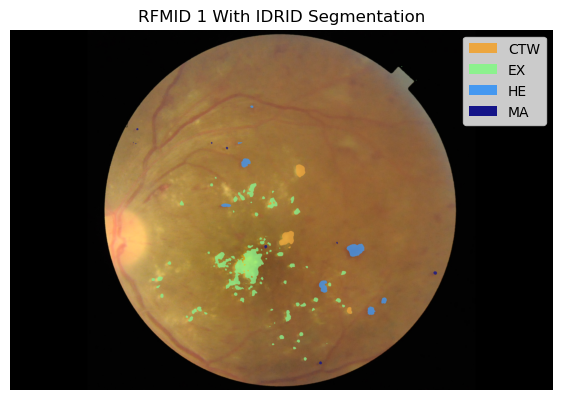

In [5]:
pred = segment(img, device='cpu', weights='idrid')
plot_image_and_mask(img, pred, alpha=0.8, title='RFMID 1 With IDRID Segmentation', figsize=fsize, colors=DEFAULT_COLORS, labels=LESIONS)

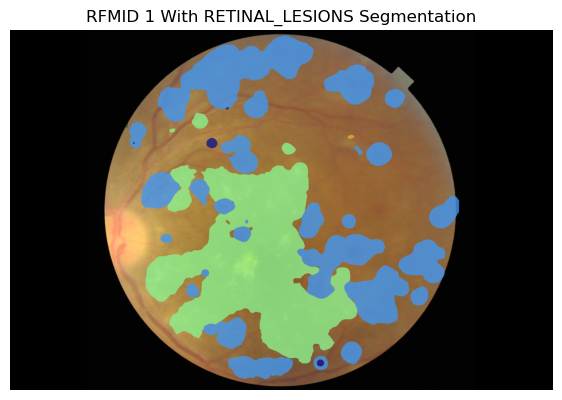

In [6]:
pred = segment(img, device='cpu', weights='RETINAL_LESIONS') # Upper or Lower case accepted
plot_image_and_mask(img, pred, alpha=0.8, title='RFMID 1 With RETINAL_LESIONS Segmentation', figsize=fsize, colors=DEFAULT_COLORS) # No legend

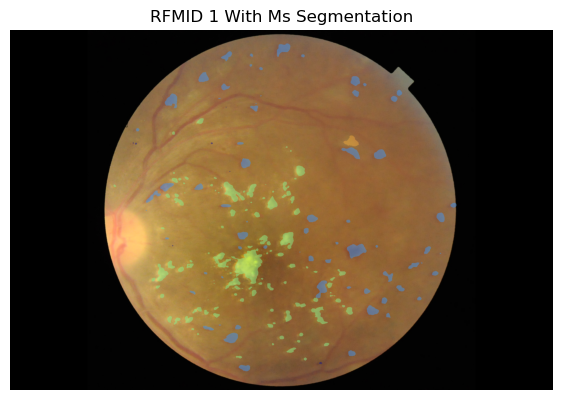

In [7]:
pred = segment(img, device='cpu', weights='ALL')
plot_image_and_mask(img, pred, alpha=0.5, title='RFMID 1 With Ms Segmentation', figsize=fsize, colors=DEFAULT_COLORS)